In [148]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Abstract

El dataset utilizado está disponible en "Los Angeles Open Data". El mismo abarca los incidentes criminales en Los Ángeles entre los años 2020 y 2023. Cuenta con variables como la distribución geográfica de crímenes, perfiles demográficos de las víctimas y detalles sobre tipos de crímenes, mi motivación es revelar patrones y tendencias significativas para el alto mando de la policía federal de Los Ángeles.

A lo largo de esta exploración, compartiré no solo los resultados, sino también las reflexiones personales que surgen al descifrar estos datos. 

## Hipótesis y preguntas

Se plantea la hipótesis de que la edad y el género de las víctimas de crímenes en Los Ángeles están correlacionados con la naturaleza y la ubicación de los incidentes. Se espera que ciertos grupos demográficos sean más susceptibles a ciertos tipos de crímenes y que la distribución geográfica de los incidentes varíe en función de factores demográficos específicos. Además, se sugiere que la prevalencia de ciertos tipos de crímenes puede variar según la hora del día y la ubicación, afectando a diferentes grupos de edad de manera diferente. Esta hipótesis busca explorar las complejas interacciones entre la demografía de las víctimas y la naturaleza de los crímenes, proporcionando una comprensión más profunda de los patrones subyacentes en los datos de crímenes de Los Ángeles.

1. ¿Existe una correlación entre la edad de las víctimas y la frecuencia de crímenes en áreas específicas de Los Ángeles?
2. ¿Cómo varía la distribución de género de las víctimas según la edad?
3. ¿La hora del día afecta la naturaleza de los crímenes en función de la edad de las víctimas?
4. ¿Cómo se distribuyen los crímenes en relación con la edad de las víctimas y el día de la semana de los incidentes?

Estaré aborando un **problema de regresión**, ya que me gustaría predecir cantidades de crímenes en base a las variables mencionadas.

Mi **variable target** será "Vict Age Group", es una variable que se creará para agrupar a las victimas en dos grupos para hacer un modelo con variable binaria.

**Contexto comercial** La policia de Los Ángeles necesita mejorar su estrategia para brindar la mejor seguridad de todo el país. Para ello, sería interesante, a medida que se va actualizando la información, conocer la cantidad de víctimas según sus características y ubicación de los crímenes para armar de forma mensual la distribución policial adecuada.

**Problema comercial** Como la policía no sabe cuántas víctimas habrá en el futuro, no sabe cómo armar la mejor distribución de sus tropas a lo largo de la ciudad. 

**Contexto analítico** El dataset cuenta con 717,699 reportes de crímenes y las siguientes variables:

- DR_NO = ID del reporte
- Date Rptd = Fecha del reporte
- DATE OCC = Fecha del crimen
- TIME OCC = Hora del crimen
- AREA = ID del área
- AREA NAME = Nombre del área
- Rpt Dist No = Nro que representa una subárea dentro de un Área Geográfica
- Part 1-2 = No se tiene información (identificación de 1 o 2), no se utilizará para el análisis
- Crm Cd = ID del tipo de crimen
- Crm Cd Desc = Descripción del crimen
- Mocodes = Modus Operandi
- Vict Age = Edad de la víctima
- Vict Sex = Sexo de la víctima
- Vict Descent = Descendencia de la víctima
- Premis Cd = ID de la premisa
- Premis Desc = Premisa: tipo de estructura, vehículo o lugar donde ocurrió el delito
- Weapon Used Cd = ID del arma
- Weapon Desc = Descripción del arma
- Status = Estatus del caso
- Status Desc = Descripción del estatus
- Crm Cd 1 = Código de crímen 1 (no se utilizará esta variable)
- Crm Cd 2 = Código de crímen 2 (no se utilizará esta variable)
- Crm Cd 3 = Código de crímen 3 (no se utilizará esta variable)
- Crm Cd 4 = Código de crímen 4 (no se utilizará esta variable)
- LOCATION = Dirección del incidente del crimen redondeada a la centena de cuadra más cercana para mantener el anonimato
- Cross Street = Cruce de calle de dirección redondeada
- LAT = Latitud 
- LON = Longitud


In [67]:
# Importo mi dataset

df = pd.read_csv("c:\\Users\\naara\\Desktop\\Data\\Datasets\\Crime Data from 2020 to Present - Jessica Oshiro.csv")

In [68]:
# Conocer cómo identificó Python los datos de mi dataset, es decir, de qué tipo son para ajustarlos

data_types = df.dtypes
print(data_types)

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object


In [69]:
# Voy crear nuevas columnas con el tipo correcto para ajustar las columnas mal identificadas por Python

# Ajuste de las fechas que las toma como objetos

df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
df['DATE OCC_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)

# Ajuste de las horas que las toma como enteros

df['TIME_OCC_Correct'] = df['TIME OCC'].astype(str).str.zfill(4)  # Agrega ceros a la izquierda si es necesario
df['TIME_OCC_Correct'] = df['TIME_OCC_Correct'].str[:2] + ':' + df['TIME_OCC_Correct'].str[2:]
df['TIME_OCC_Correct'] = pd.to_datetime(df['TIME_OCC_Correct'], format='%H:%M', errors='coerce')  # Convertir la columna al tipo de dato de tiempo

# Verifico cómo han quedado mis nuevas columnas

print(df[['Date_Rptd_Correct', 'DATE OCC_Correct', 'TIME_OCC_Correct']].dtypes)



C:\Users\naara\AppData\Local\Temp\ipykernel_12512\284583962.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
C:\Users\naara\AppData\Local\Temp\ipykernel_12512\284583962.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Rptd_Correct'] = pd.to_datetime(df['Date Rptd'], infer_datetime_format=True)
C:\Users\naara\AppData\Local\Temp\ipykernel_12512\284583962.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/p

Date_Rptd_Correct    datetime64[ns]
DATE OCC_Correct     datetime64[ns]
TIME_OCC_Correct     datetime64[ns]
dtype: object


In [70]:
# Reviso qué información tiene mi variable 'Vict Age'

age_min = df['Vict Age'].min()
age_max = df['Vict Age'].max()
print(f"Age Min: {age_min}")
print(f"Age Max: {age_max}")

Age Min: -2
Age Max: 120


In [71]:
# Veo cuántos registros implican esos valores atípicos

minimum_age_count = df.loc[df['Vict Age'] == age_min].shape[0]
maximum_age_count = df.loc[df['Vict Age'] == age_max].shape[0]

# Mostrar los valores y sus conteos
print(f"Age Min: {age_min} - Quantity: {minimum_age_count}")
print(f"Age Max: {age_max} - Quantity: {maximum_age_count}")

Age Min: -2 - Quantity: 8
Age Max: 120 - Quantity: 1


In [72]:
# Se podría considerar que esos 8 registros con edad -2 pueden ser fetos, por lo cual, para homogeneizar voy a reemplazarlos por el valor 0 y como la edad 120 es un solo registro, voy a eliminarlo y veo cuáles son mis nuevo extremos

df = df.loc[df['Vict Age'] <= 100]
df.loc[df['Vict Age'] < 1, 'Vict Age'] = 1

new_minimum_value = df['Vict Age'].min()
new_maximum_value = df['Vict Age'].max()

print(f"New values': {new_minimum_value}, {new_maximum_value}")



New values': 1, 99


In [73]:
# Creo mi variable target binaria

df['Vict Age Group'] = pd.cut(df['Vict Age'], bins=[0, 18, float('inf')], labels=['Children/Teens', 'Adults/Seniors'])

print(df[['Vict Age','Vict Age Group']])

        Vict Age  Vict Age Group
0             36  Adults/Seniors
1             25  Adults/Seniors
2              1  Children/Teens
3             76  Adults/Seniors
4             31  Adults/Seniors
...          ...             ...
717695        23  Adults/Seniors
717696        25  Adults/Seniors
717697        29  Adults/Seniors
717698        20  Adults/Seniors
717699        53  Adults/Seniors

[717699 rows x 2 columns]


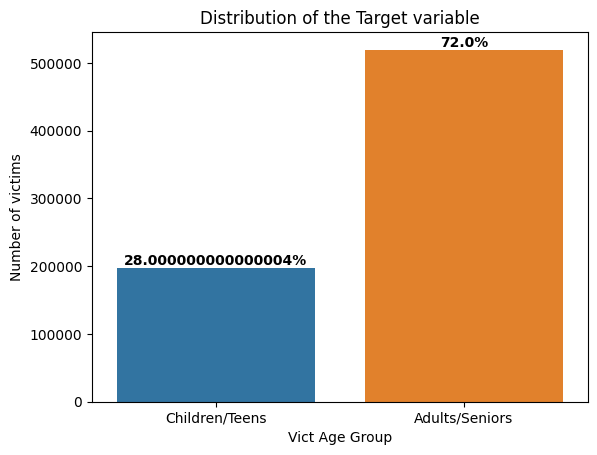

In [74]:
cantidad = len(df['Vict Age Group'])

sns.countplot(data = df,
              x = "Vict Age Group")
plt.xlabel('Vict Age Group')
plt.ylabel('Number of victims')
plt.title('Distribution of the Target variable')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

## 1. ¿Existe una correlación entre la edad de las víctimas y la frecuencia de crímenes en áreas específicas de Los Ángeles?

Se puede observar que para las 4 regiones el grupo más afectado es el grupo de adulos + ancianos.

In [75]:
# Reviso qué información tiene mi variable AREA NAME

print(df['AREA NAME'].unique())


['Southwest' 'Central' 'N Hollywood' 'Mission' 'Devonshire' 'Northeast'
 'Harbor' 'Van Nuys' 'West Valley' 'West LA' 'Wilshire' 'Pacific'
 'Rampart' '77th Street' 'Hollenbeck' 'Southeast' 'Hollywood' 'Newton'
 'Foothill' 'Olympic' 'Topanga']


In [76]:
# Voy a realizar una agrupación para que mis gráficos no sean tan grandes

area_mapping = {
    'Southwest': 'West',
    'Central': 'Central',
    'N Hollywood': 'North',
    'Mission': 'North',
    'Devonshire': 'North',
    'Northeast': 'North',
    'Harbor': 'South',
    'Van Nuys': 'North',
    'West Valley': 'West',
    'West LA': 'West',
    'Wilshire': 'Central',
    'Pacific': 'South',
    'Rampart': 'Central',
    '77th Street': 'South',
    'Hollenbeck': 'Central',
    'Southeast': 'South',
    'Hollywood': 'Central',
    'Newton': 'Central',
    'Foothill': 'North',
    'Olympic': 'Central',
    'Topanga': 'West'
}

df['Area_Grouped'] = df['AREA NAME'].map(area_mapping) # Creo una nueva columna con áreas agrupadas


In [77]:
# Verifico cantidades

total_area = df['AREA NAME'].count()
total_area_grouped = df['Area_Grouped'].count()
total_vict_age = df['Vict Age'].count()
total_vict_age_group = df['Vict Age Group'].count()

print("Total de la columna 'AREA NAME':", total_area)
print("Total de la columna 'Area_Grouped':", total_area_grouped)
print("Total de la columna 'Vict Age':", total_vict_age)
print("Total de la columna 'Vict Age Group':", total_vict_age_group)

Total de la columna 'AREA NAME': 717699
Total de la columna 'Area_Grouped': 717699
Total de la columna 'Vict Age': 717699
Total de la columna 'Vict Age Group': 717699


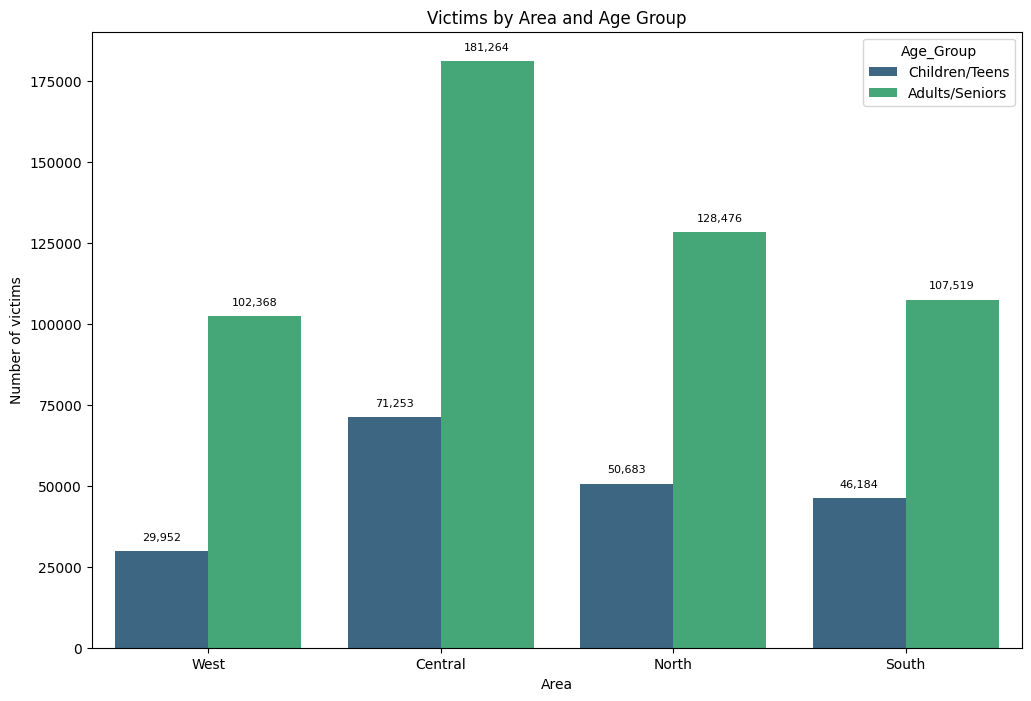

In [78]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Area_Grouped', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by Area and Age Group')
plt.xlabel('Area')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

# 2. ¿Cómo varía la distribución de género de las víctimas según la edad?

El grupo de adultos + ancianos masculinos es el grupo más afectado.

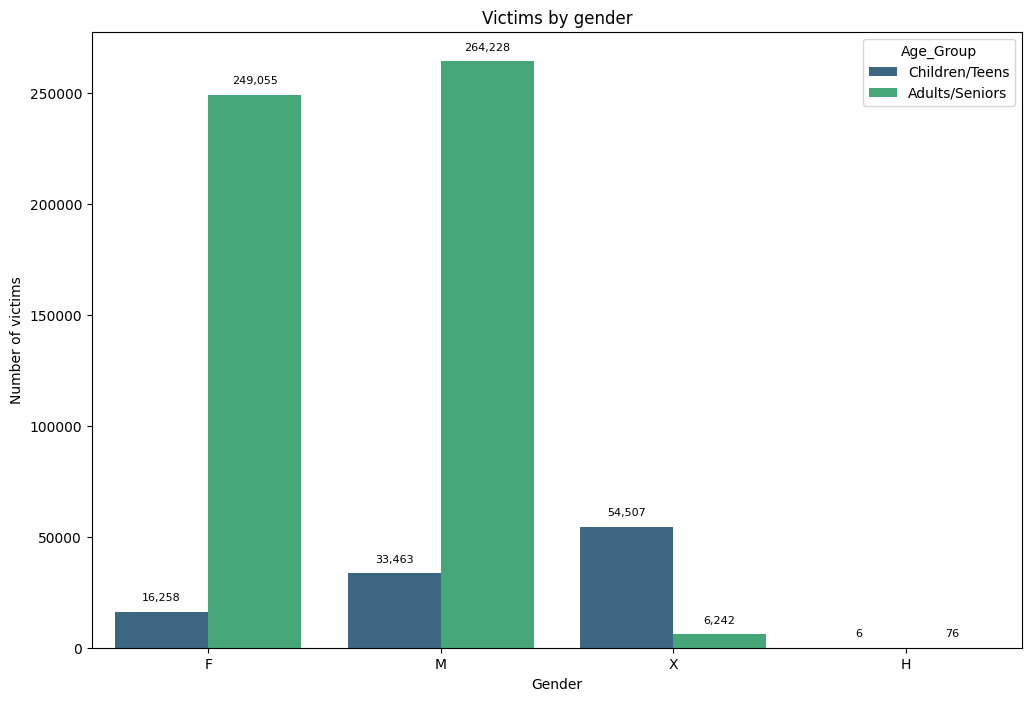

In [79]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Vict Sex', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by gender')
plt.xlabel('Gender')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

## 3. ¿La hora del día afecta la naturaleza de los crímenes en función de la edad de las víctimas?

Se puede observar un gran número de crímenes durante la noche, y que el grupo más afectado son los adultos + ancianos.

In [80]:
# Voy a realizar una agrupación para que mis gráficos no sean tan grandes

df['Time_Class'] = pd.cut(df['TIME_OCC_Correct'].dt.hour,
                          bins=[0, 6, 12, 18, 24],
                          labels=['Night', 'Morning', 'Afternoon', 'Night'],
                          include_lowest=True,
                          ordered=False)

# Mostrar el DataFrame resultante
print(df[['TIME_OCC_Correct', 'Time_Class']])

          TIME_OCC_Correct Time_Class
0      1900-01-01 22:30:00      Night
1      1900-01-01 03:30:00      Night
2      1900-01-01 12:00:00    Morning
3      1900-01-01 17:30:00  Afternoon
4      1900-01-01 04:15:00      Night
...                    ...        ...
717695 1900-01-01 18:00:00  Afternoon
717696 1900-01-01 10:00:00    Morning
717697 1900-01-01 16:30:00  Afternoon
717698 1900-01-01 13:30:00  Afternoon
717699 1900-01-01 09:00:00    Morning

[717699 rows x 2 columns]


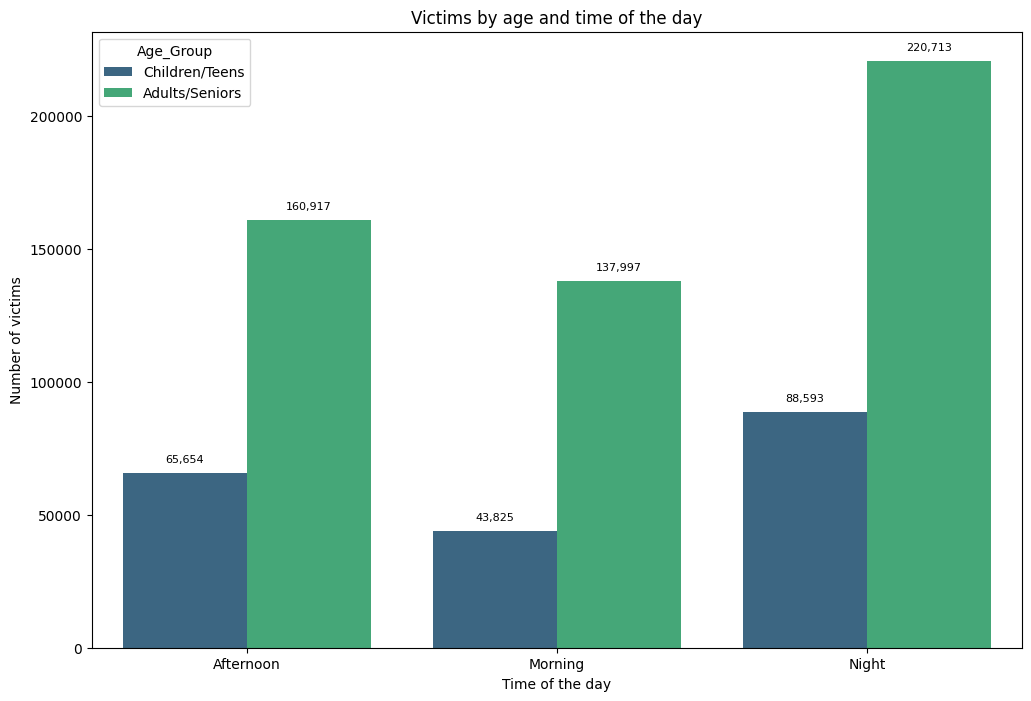

In [81]:
#Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Time_Class', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by age and time of the day')
plt.xlabel('Time of the day')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

## 4. ¿Cómo se distribuyen los crímenes en relación con la edad de las víctimas y el día de la semana de los incidentes?

El lunes es el día en donde hay más crímenes y los adultos + ancianos son los más afectados, entonces en base a esto, se podría recomendar que se tomen más medidas de seguridad en dicho día y, en base al gráfico anterior, más especificamente durante el turno noche.

In [82]:
# Creo una columna que me diga el día de la semana

df['DATE OCC_Correct'] = pd.to_datetime(df['DATE OCC_Correct']) 
df['Day_of_Week'] = df['DATE OCC_Correct'].dt.day_name()

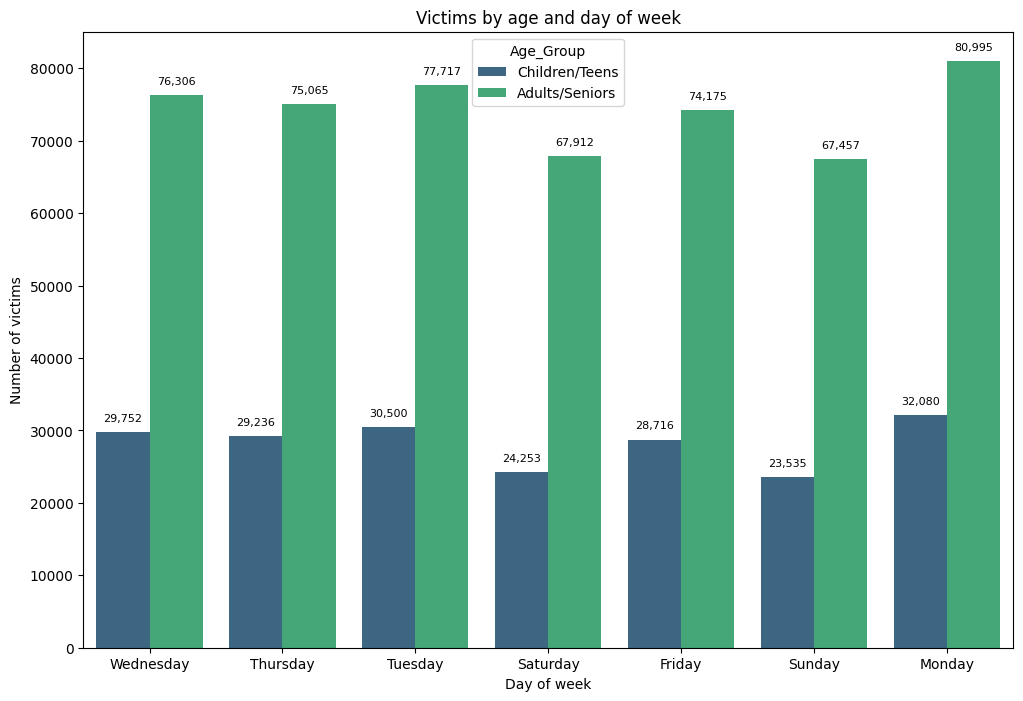

In [83]:
# Grafico

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df, x='Day_of_Week', hue='Vict Age Group', palette='viridis')

for p in ax.patches:
    count_text = '{:,}'.format(int(p.get_height())) 
    ax.annotate(count_text, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)


plt.title('Victims by age and day of week')
plt.xlabel('Day of week')
plt.ylabel('Number of victims')
plt.legend(title='Age_Group')

plt.show()

# Exploración valores vacíos

In [84]:
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos > 0]
print('Cantidad de columnas con valores vacíos:')
print(columnas_con_nulos.shape)
print('')
print('Variables con valores vacíos: ')
print(columnas_con_nulos.sort_values(ascending=False))

Cantidad de columnas con valores vacíos:
(12,)

Variables con valores vacíos: 
Crm Cd 4          717645
Crm Cd 3          715913
Crm Cd 2          664374
Cross Street      601766
Weapon Used Cd    468593
Weapon Desc       468593
Mocodes            98453
Vict Descent       93870
Vict Sex           93864
Premis Desc          398
Premis Cd              8
Crm Cd 1               8
dtype: int64


In [85]:
# Reviso los datos de la columna 

print(df['Vict Sex'].unique())

['F' 'M' 'X' nan 'H']


In [86]:
nan_count = df['Vict Sex'].isna().sum()
h_count = (df['Vict Sex'] == 'H').sum()

print(f"Cantidad de registros con 'Vict Sex' como NaN: {nan_count}")
print(f"Cantidad de registros con 'Vict Sex' igual a 'H': {h_count}")

Cantidad de registros con 'Vict Sex' como NaN: 93864
Cantidad de registros con 'Vict Sex' igual a 'H': 82


Adicional a los vacios, me llama la atención también la categoría H. Según la página en donde es posible descargar el dataset y obetener información de las columnas, para la columna "Vict Sex" solo se debería admitir las letras F = Female, M = Male y X = Unknown. Dado que no hay más infomración al respecto voy a optar por rellenar estos valores con la moda.

Total de registros 717,699

H = 0.01%
NaN = 13.07%

In [87]:
df['Vict Sex'] = df['Vict Sex'].replace('H', np.nan)

# Imprimir el DataFrame con la modificación
print(df[['Vict Sex']])

       Vict Sex
0             F
1             M
2             X
3             F
4             X
...         ...
717695        M
717696        F
717697        M
717698        F
717699        F

[717699 rows x 1 columns]


In [88]:
mode_vict_sex = df['Vict Sex'].mode()[0]
df['Vict Sex'].fillna(mode_vict_sex, inplace=True)

In [89]:
print(df['Vict Sex'].isnull().sum())

0


Aplico el mismo método para la columna "Vict Descent". Por el momento son las columnas que considero útil, el resto no las usaré para mi análisis.

In [90]:
mode_vict_des = df['Vict Descent'].mode()[0]
df['Vict Descent'].fillna(mode_vict_des, inplace=True)

In [91]:
print(df['Vict Descent'].isnull().sum())

0


In [92]:
# Definir un umbral para clasificar como joven o adulto/anciano
umbral_edad = 18

# Crear una nueva columna 'Target' basada en la edad
df['Target'] = (df['Vict Age'] > umbral_edad).astype(int)

# Imprimir el DataFrame con la nueva columna 'Target'
print(df[['Vict Age', 'Target']])

        Vict Age  Target
0             36       1
1             25       1
2              1       0
3             76       1
4             31       1
...          ...     ...
717695        23       1
717696        25       1
717697        29       1
717698        20       1
717699        53       1

[717699 rows x 2 columns]


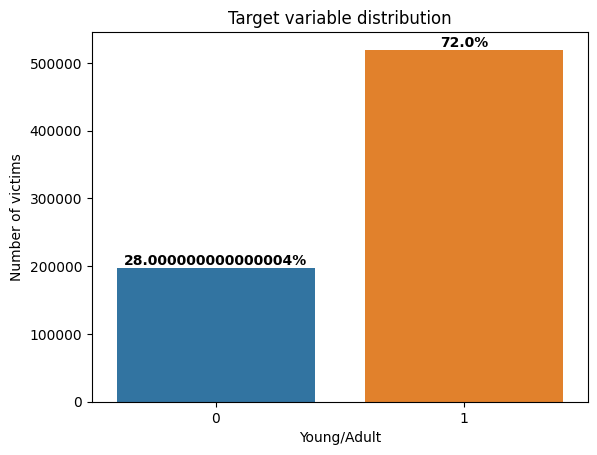

In [93]:
cantidad = len(df['Target'])

sns.countplot(data = df,
              x = "Target")
plt.xlabel('Young/Adult')
plt.ylabel('Number of victims')
plt.title('Target variable distribution')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

El 72% de las víctimas son adultas/ancianas, 28% son jóvenes